Изучим данные о пассажирах Титаника. Предскажем, кто выживет на корабле, зная различные реквизиты пассажиров.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

Загрузим выборку из titanic.csv

In [3]:
data = pd.read_csv(filepath_or_buffer='Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Удалим пропущенные значения в выборке

In [4]:
data.dropna(subset=['Pclass', 'Fare', 'Age', 'Sex', 'Survived'], inplace=True)

Заменим все строковые значения на числовые

In [5]:
data[['Pclass', 'Fare', 'Age', 'Survived']] = data[['Pclass', 'Fare', 'Age', 'Survived']].astype(float)
data.loc[(data.Sex == 'male'), 'Sex'] = 1
data.loc[(data.Sex == 'female'), 'Sex'] = 0
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0.0,3.0,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2.0,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


Отберем из выборки следующие признаки: Pclass, Fare, Age, Sex

In [6]:
FEATURE_NAMES = ['Pclass', 'Fare', 'Age', 'Sex']
data_X = data[FEATURE_NAMES]
data_y = data['Survived']
data_X, data_y

(     Pclass     Fare   Age Sex
 0       3.0   7.2500  22.0   1
 1       1.0  71.2833  38.0   0
 2       3.0   7.9250  26.0   0
 3       1.0  53.1000  35.0   0
 4       3.0   8.0500  35.0   1
 ..      ...      ...   ...  ..
 885     3.0  29.1250  39.0   0
 886     2.0  13.0000  27.0   1
 887     1.0  30.0000  19.0   0
 889     1.0  30.0000  26.0   1
 890     3.0   7.7500  32.0   1
 
 [714 rows x 4 columns],
 0      0.0
 1      1.0
 2      1.0
 3      1.0
 4      0.0
       ... 
 885    0.0
 886    0.0
 887    1.0
 889    1.0
 890    0.0
 Name: Survived, Length: 714, dtype: float64)

Разделим данные на обучающие и тестовые выборки, а далее построим модель, используя DecisionTreeClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=100)
clf = tree.DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
y_new = clf.predict(X_test)
y_new

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0.])

Проверим процент правильных предсказанных ответов

In [8]:
accuracy_score(y_test, y_new)

0.7430167597765364

Посмотрим на само дерево решений

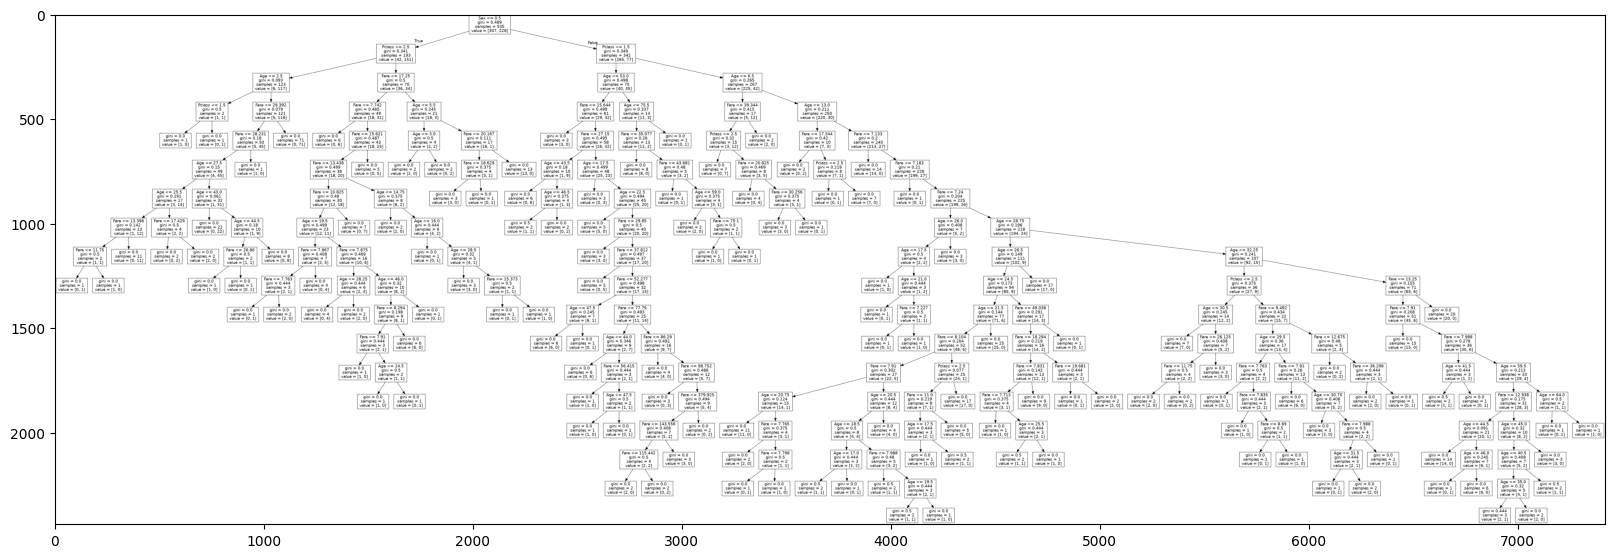

In [9]:
%matplotlib inline
tree.export_graphviz(clf, 'tree.dot', feature_names=FEATURE_NAMES)
! dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.figure(figsize=(20, 20))
plt.imshow(img)

Выведем важность признаков и выберем из них два самых важных

In [12]:
importances = clf.feature_importances_
dict_of_importances = {}
for i, importance in enumerate(importances):
    dict_of_importances[importance] = FEATURE_NAMES[i]

importances = np.sort(importances)
dict_of_importances[importances[-1]], dict_of_importances[importances[-2]]

('Fare', 'Sex')